# Dimensionality Reduction

## PCA (Principal Component Analysis)

In [2]:
# Data prep
import pandas as pd

df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [4]:
data = df.iloc[:, 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [6]:
data.dtypes # all numeric!

books          float64
tv_shows       float64
video_games    float64
dtype: object

In [8]:
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

In [10]:
df_centered = data - data.mean()
df_centered.head()

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333
3,0.506667,-0.086,0.756667
4,-0.193333,-0.786,-0.243333


In [12]:
df_centered.mean() # Very small number close to 0. This means our center logic works.

books          1.287859e-16
tv_shows      -3.434290e-16
video_games   -3.730349e-16
dtype: float64

In [ ]:
# Model

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(df_centered)

PCA(n_components=2)

In [16]:
pca.explained_variance_ratio_ # First component captured 88% of the variance in the data, Second comp 0.08%.

array([0.88175186, 0.08603611])

In [17]:
# What would happen if we set n_components to be equal to the same number of columns?
pca3 = PCA(n_components=3)
pca3.fit(df_centered)

PCA(n_components=3)

In [18]:
pca3.explained_variance_ratio_

array([0.88175186, 0.08603611, 0.03221203])

In [19]:
sum(pca3.explained_variance_ratio_) # gives 100% of captured variance data.

1.0

### Interpreting PCA

In [20]:
pca.explained_variance_ratio_

array([0.88175186, 0.08603611])

In [21]:
pca.components_

array([[ 0.93143032, -0.11629655,  0.34483717],
       [-0.04900906,  0.89884697,  0.43551376]])

In [24]:
df_centered.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [25]:
# PC1: higher = books
# PC2: higher = tv shows

In [26]:
df_centered.head()

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333
3,0.506667,-0.086,0.756667
4,-0.193333,-0.786,-0.243333


In [29]:
df_transformed = pd.DataFrame(pca.transform(df_centered), columns=['pc1', 'pc2'])
df_transformed.head()

,pc1,pc2
0,-2.649291,-0.276055
1,-3.137860,-0.384986
2,-2.603177,-0.322388
3,0.742853,0.227407
4,-0.172578,-0.802994


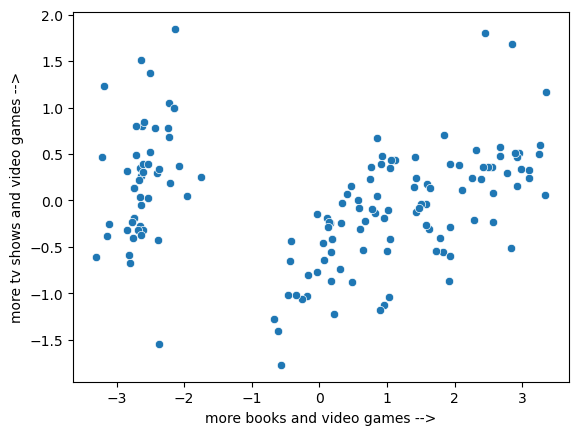

In [30]:
# view the data on a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='pc1', y='pc2', data=df_transformed)
plt.xlabel('more books and video games -->')
plt.ylabel('more tv shows and video games -->');

## T-SNE

In [32]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(n_components=2, random_state=42)

In [41]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [42]:
data_tsne = tsne.fit_transform(data)
data_tsne

array([[-23.318752  ,   2.6139314 ],
       [-22.629585  ,   1.0504593 ],
       [-23.092262  ,   2.936064  ],
       [  9.545883  ,  -0.20673098],
       [  9.970232  ,   5.014492  ],
       [  8.3513155 ,  -7.770122  ],
       [  9.180932  ,  -2.6234272 ],
       [  8.608795  ,   3.25267   ],
       [-22.890818  ,   0.9274614 ],
       [  8.617579  ,   0.58255225],
       [  9.471378  ,  -4.5547986 ],
       [-23.734774  ,   1.9649149 ],
       [-26.393087  ,   1.9417486 ],
       [-23.996412  ,   2.8369765 ],
       [-26.046324  ,   3.0863326 ],
       [-28.53425   ,   4.533817  ],
       [  9.173117  ,   1.492894  ],
       [-25.128502  ,   2.9926739 ],
       [  8.555773  ,  -8.764802  ],
       [  6.883111  ,  -6.889519  ],
       [  9.807123  ,  -1.1228112 ],
       [ 11.875952  ,   2.223524  ],
       [  9.839272  ,   2.5641007 ],
       [  9.157952  ,  -6.097444  ],
       [  9.065779  ,   4.110145  ],
       [ 10.155744  ,  -3.8015487 ],
       [-22.223665  ,   1.9308085 ],
 

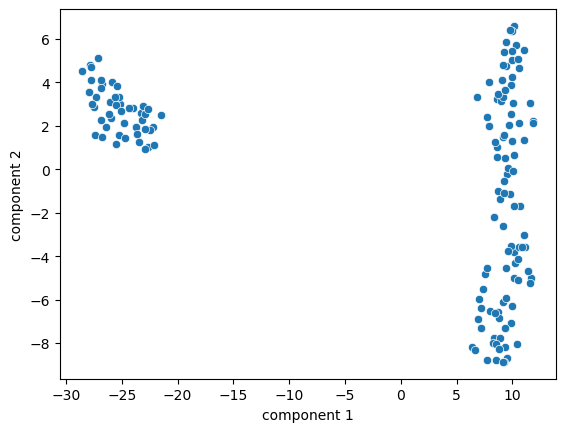

In [43]:
# plot the data
df_tsne = pd.DataFrame(data_tsne, columns=['component 1', 'component 2'])

sns.scatterplot(x='component 1', y='component 2', data=df_tsne);